In [14]:
import pandas as pd
import matplotlib.pyplot as plt

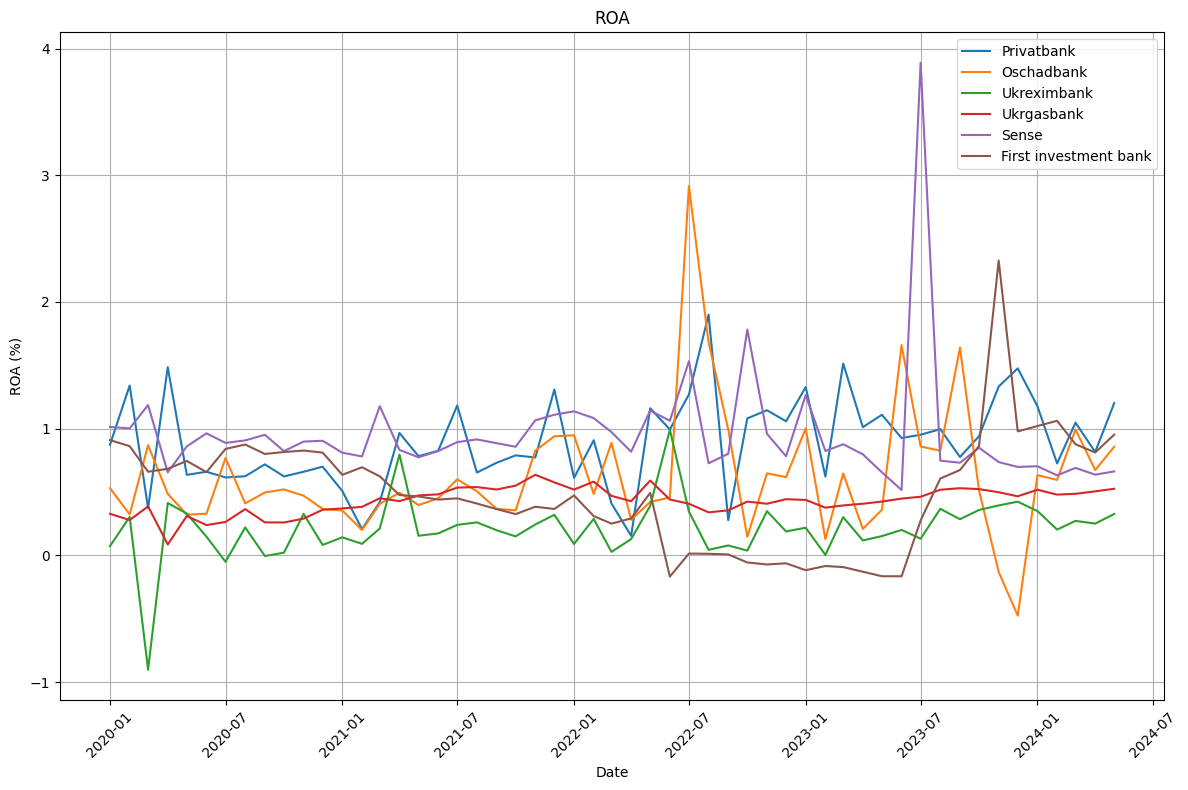

In [16]:
# Load total_income.csv and total_assets.csv
df_income = pd.read_csv('data/differenced/total_income.csv', index_col=0)
df_assets = pd.read_csv('data/original/total_assets.csv', index_col=0)

# Calculate the ratio of income to assets for each bank
ratio_df = (df_income / df_assets) * 100

# Plotting
plt.figure(figsize=(12, 8))

for bank in ratio_df.columns:
    plt.plot(pd.to_datetime(ratio_df.index), ratio_df[bank], label=bank.capitalize())

plt.title('ROA')
plt.xlabel('Date')
plt.ylabel('ROA (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

